In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mode_solutions import Solver
from waveguide import Waveguide
from scipy.constants import c

# Test notebook for using Lumerical in python 

### Simulation parameters

In [6]:
material_parameters = {
'width': 2e-6,
'height':330e-9,
'top_cladding_thickness': 0.75e-6,
'bottom_cladding_thickness':3.3e-6,
'Mode_resolution':100,
'material_wg': "SiN (Silicon Nitride) - MuensterSpecs",
'material_clad': "HSQ - Munster spec"
}

# material_parameters = {
# 'width': 2e-6,
# 'height':220e-9,
# 'top_cladding_thickness': 2e-6,
# 'bottom_cladding_thickness':3e-6,
# 'Mode_resolution':250,
# 'material_wg': "Si (Silicon) - Palik",
# 'material_clad': "SiO2 (Glass) - Palik"
# }

start_wavelength = 1.5525e-6
stop_wavelength = 1.5575e-6
points = 11
step = (stop_wavelength-start_wavelength) / (points-1)

general_params = {
"wavelength" : 1.55e-6,
"start_wavelength":start_wavelength,
"stop_wavelength":stop_wavelength,
"N_points_Disp":points,
"d_wavelength" :step,
"Lc" : 1e-6,
"mesh_dx" : 0.05e-6,
"mesh_dy" : 0.05e-6,
"substrate_height": 2e-6,
"num_TE" : 3
}

### Initialise mode solutions

In [4]:
simulation_params = dict()
simulation_params.update(material_parameters)
simulation_params.update(general_params)

mode = Solver(simulation_params)

Initialising MODE instance...
Inputting simulation parameters...
Fitting material parameters...
Initialisation complete


# Run dispersion sweep

In [5]:
checked_params = mode.freq_sweep()


Performing frequency sweep
Sweep complete
3
2
3
2
3
2
3
2


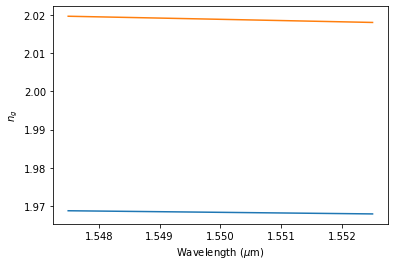

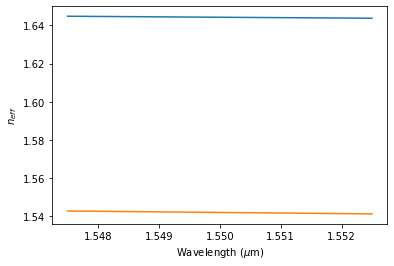

In [8]:

fig,ax = plt.subplots()
ax.plot(checked_params['wav'][0]*1e6,c/checked_params['vg'][0],label = 'TE0')
ax.plot(checked_params['wav'][0]*1e6,c/checked_params['vg'][1], label = 'TE1')
ax.ticklabel_format(useOffset=False)
ax.set_xlabel(r'Wavelength ($\mu$m)')
ax.set_ylabel(r'$n_g$')
plt.show()

fig,ax = plt.subplots()
ax.plot(checked_params['wav'][0]*1e6,np.real(checked_params['neff'][0]),label = 'TE0')
ax.plot(checked_params['wav'][0]*1e6,np.real(checked_params['neff'][1]), label = 'TE1')
ax.ticklabel_format(useOffset=False)
ax.set_xlabel(r'Wavelength ($\mu$m)')
ax.set_ylabel(r'$n_{eff}$')
plt.show()

# Test Waveguide class

In [19]:
extra_params = ('TE',False,False)
wg = Waveguide(material_parameters,general_params,*extra_params)

Initialising MODE instance...


Exception ignored in: <function Lumerical.__del__ at 0x00000125383098C8>
Traceback (most recent call last):
  File "C:\Program Files\Lumerical\v212\api\python\lumapi.py", line 1174, in __del__
    close(self.handle)
AttributeError: 'MODE' object has no attribute 'handle'


Inputting simulation parameters...
Fitting material parameters...
Initialisation complete


Performing frequency sweep
Sweep complete
(3, 11)
(3, 11)
(3, 1)
(3, 11)


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


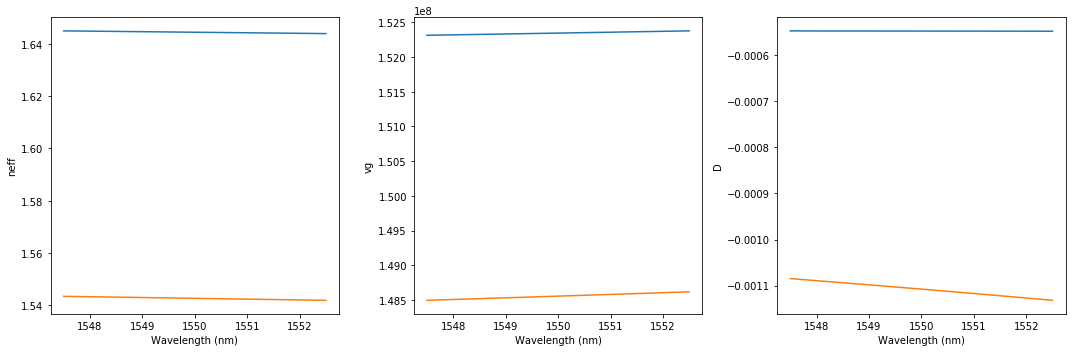

{'neff': array([[1.64501142-3.45020067e-17j, 1.64490729-3.45150382e-17j,
         1.64480312-3.45280239e-17j, 1.64469891-3.45409637e-17j,
         1.64459466-3.45538576e-17j, 1.64449037-3.45667058e-17j,
         1.64438603-3.45795081e-17j, 1.64428166-3.45922646e-17j,
         1.64417725-3.46049754e-17j, 1.64407279-3.46176404e-17j,
         1.6439683 -3.46302597e-17j],
        [1.54340131-2.80879396e-17j, 1.54324817-2.79873048e-17j,
         1.54309498-2.78836338e-17j, 1.54294175-2.77768355e-17j,
         1.54278847-2.76668158e-17j, 1.54263514-2.75534773e-17j,
         1.54248177-2.74367195e-17j, 1.54232835-2.73164384e-17j,
         1.54217489-2.71925264e-17j, 1.54202139-2.70648723e-17j,
         1.54186783-2.69333611e-17j]]),
 'vg': array([[1.52312775e+08, 1.52319109e+08, 1.52325447e+08, 1.52331791e+08,
         1.52338140e+08, 1.52344495e+08, 1.52350854e+08, 1.52357219e+08,
         1.52363590e+08, 1.52369965e+08, 1.52376346e+08],
        [1.48497649e+08, 1.48509601e+08, 1.48521611e+0

In [20]:
'''Dispersion data'''

wg.get_dispersion_info()
# wg.plot_dispersion_data()

Getting mode info...


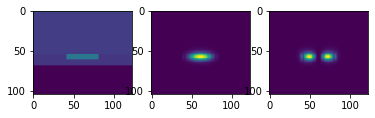

{'neff': array([[1.64501138-3.75934229e-17j],
        [1.54340127-2.61237717e-17j]]), 'is_TE': array([[0.99920694],
        [0.98153937]]), 'x_array': array([-4.50000000e-06, -4.41153846e-06, -4.32307692e-06, -4.23461538e-06,
        -4.14615385e-06, -4.05769231e-06, -3.96923077e-06, -3.88076923e-06,
        -3.79230769e-06, -3.70384615e-06, -3.61538462e-06, -3.52692308e-06,
        -3.43846154e-06, -3.35000000e-06, -3.26153846e-06, -3.17307692e-06,
        -3.08461538e-06, -2.99615385e-06, -2.90769231e-06, -2.81923077e-06,
        -2.73076923e-06, -2.64230769e-06, -2.55384615e-06, -2.46538462e-06,
        -2.37692308e-06, -2.28846154e-06, -2.20000000e-06, -2.11153846e-06,
        -2.02307692e-06, -1.93461538e-06, -1.84615385e-06, -1.75769231e-06,
        -1.66923077e-06, -1.58076923e-06, -1.49230769e-06, -1.40384615e-06,
        -1.31538462e-06, -1.23868232e-06, -1.17217610e-06, -1.10766551e-06,
        -1.05000000e-06, -1.00000000e-06, -9.50000000e-07, -9.00000000e-07,
        -8.500

In [26]:
'''plot mode profiles'''
wg.get_mode_profile()